In [15]:
import numpy as np
import skimage 
import matplotlib.pyplot as plt 

from skimage.viewer import ImageViewer
from skimage.io import imread, imshow, imsave

def plot(image):
    plt.figure(figsize= [10,10])
    plt.imshow(image, cmap= plt.cm.gray)
    plt.show()
    
    
    
''' optical flow '''

from skimage import registration  

In [11]:
left_image, right_image,_ = skimage.data.stereo_motorcycle()

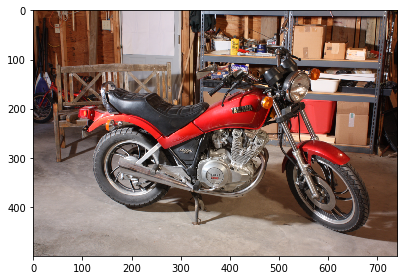

In [14]:
imshow(left_image)
imsave("./left_image.jpeg", left_image)

## gray image reconsturction from optical flow

(500, 741) (500, 741)


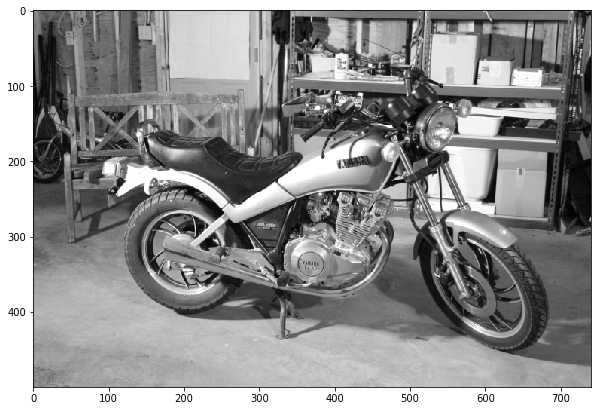

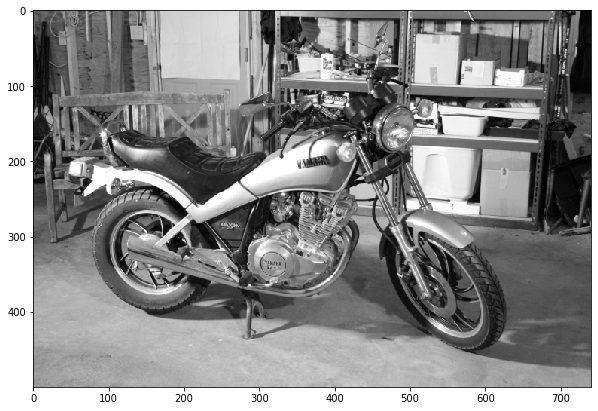

In [2]:
left_image_gray  = skimage.color.rgb2gray(left_image)
right_image_gray = skimage.color.rgb2gray(right_image)
print(left_image_gray.shape, right_image_gray.shape)

plot(left_image[:,:,0]);plot(right_image[:,:,0])

In [4]:
flow = registration.optical_flow_tvl1(left_image_gray, right_image_gray)
print(flow.shape)

(2, 500, 741)


In [5]:
recon = np.zeros_like(left_image_gray)

for i in range(recon.shape[0]):
    for j in range(recon.shape[1]):
        
        m_x = min(i + flow[0][i][j], recon.shape[0]-1)
        m_y = min(j + flow[1][i][j], recon.shape[1] -1)
        
        
            
        recon[i,j] = right_image_gray[int(m_x-1),int(m_y-1)]

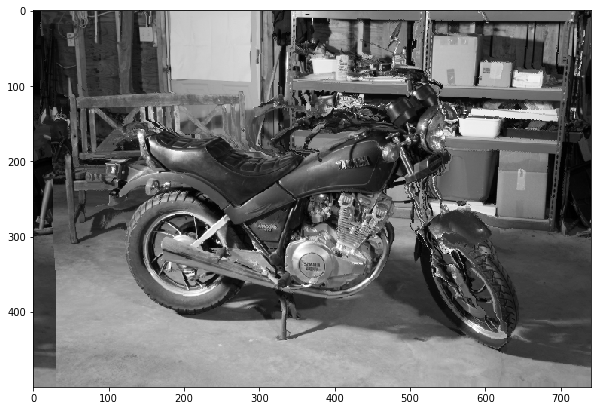

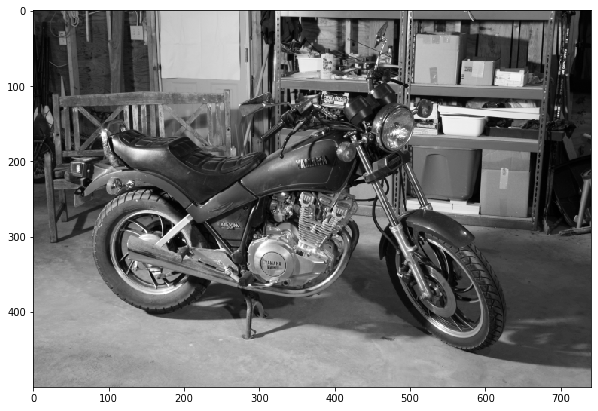

In [6]:
plot(recon)
plot(right_image_gray)

In [9]:
viewer = ImageViewer(recon)
viewer.show()

[]

## color image reconstruction from optical flow

In [16]:
flow = registration.optical_flow_tvl1(left_image, right_image)

print(flow.shape)


(3, 500, 741, 3)


In [28]:
np.min(flow[2])
np.max(flow[2])
flow[0].shape

(500, 741, 3)

In [29]:
def channel_recon(channel_flow, channel_right):
    recon = np.zeros_like(channel_right)
    print(channel_flow.shape, channel_right.shape)

    for i in range(recon.shape[0]):
        for j in range(recon.shape[1]):
            
            m_x = min(i + channel_flow[0][i][j], recon.shape[0]-1)
            m_y = min(j + channel_flow[1][i][j], recon.shape[1] -1)

            recon[i,j] = channel_right[int(m_x),int(m_y)] 
            
    return recon 

In [30]:
recon_c = np.zeros_like(left_image)

for i in range(3):
    recon_c[:,:,i] = channel_recon(flow[:,:,:,i], right_image[:,:,i])

(3, 500, 741) (500, 741)
(3, 500, 741) (500, 741)
(3, 500, 741) (500, 741)


In [31]:
recon_c.shape

(500, 741, 3)

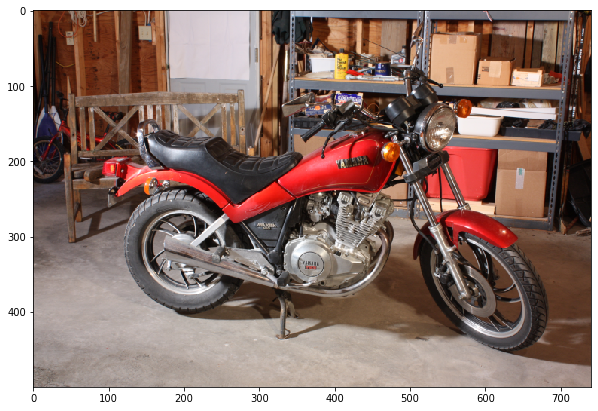

In [35]:
plot(left_image)

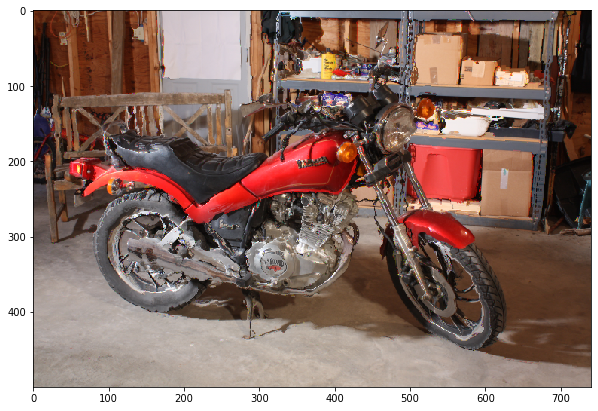

[]

In [33]:
plot(recon_c)
viewer = ImageViewer(recon_c)
viewer.show()

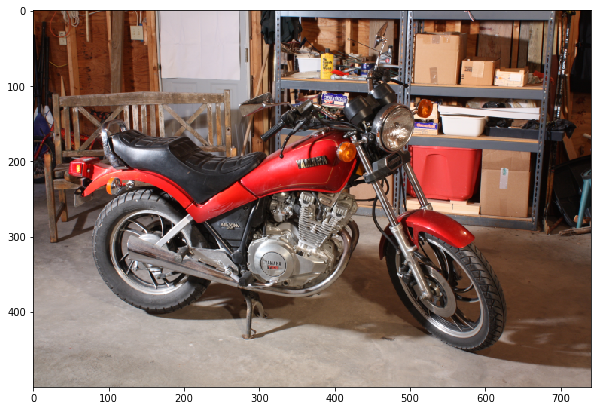

In [34]:
plot(right_image)